In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [5]:
df = pd.read_csv('Documents/churn.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# countries in dataset 
df['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [10]:
# percentage of non-active members

np.round(df.IsActiveMember.sum()/df.shape[0]*100, 2)

51.51

In [11]:
# mean age of the women who have closed their accounts with the bank

np.round(df['Age'].loc[(df.Exited==1) & (df.Gender=='Female')].mean(),2)

44.78

In [12]:
# quantile 25 and 75 of the variable age for men and women

df[['Age','Gender']].groupby('Gender').quantile([0.25,0.75])

Age
Gender           
Female 0.25  32.0
       0.75  45.0
Male   0.25  32.0
       0.75  43.0

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# number of people per country that has a credit card

df[['Geography','HasCrCard']].groupby('Geography').count()

,HasCrCard
Geography,
France,5014
Germany,2509
Spain,2477


In [15]:
# mean salary for men over 40 years old

np.round(df['EstimatedSalary'].loc[(df.Age>40) & (df.Gender=='Male')].mean(),2)

99939.41

In [16]:
# mean salary for women over 40 years old

np.round(df['EstimatedSalary'].loc[(df.Age>40) & (df.Gender=='Female')].mean(),2)

101010.98

In [17]:
# mean of members over 40 y/o

df.EstimatedSalary.loc[df.Age>40].mean()

100449.31082099973

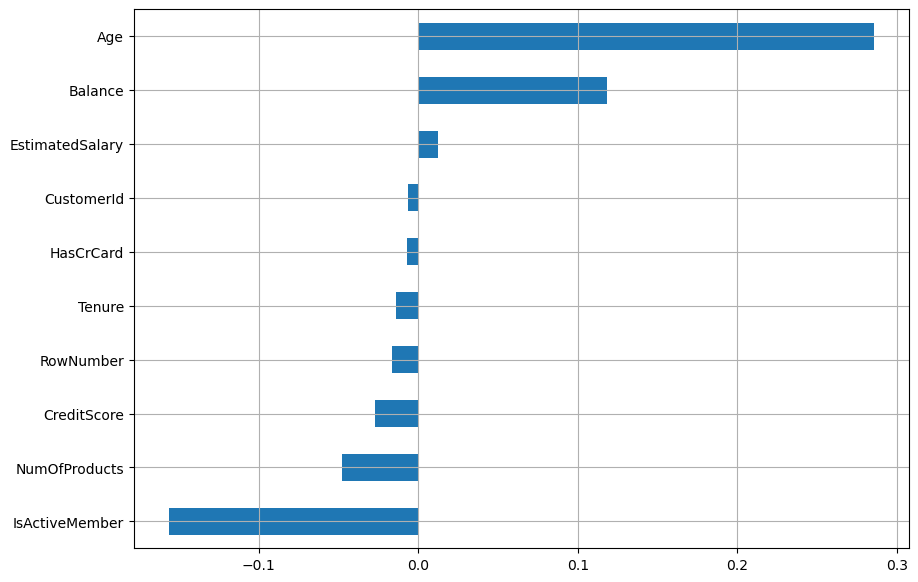

In [18]:
# correlation analysis

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()['Exited'].sort_values().drop('Exited')

plt.figure(figsize=(10,7))
correlation.plot(kind='barh')
plt.grid(True)
plt.show()

<Axes: xlabel='Exited', ylabel='CreditScore'>

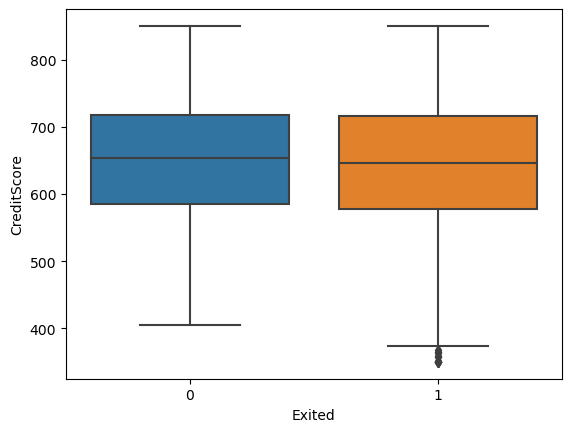

In [19]:
# compare the credit score distribution for customers who have churned the bank (1) v. those who have not (0)

sns.boxplot(data=df,x='Exited',y='CreditScore')

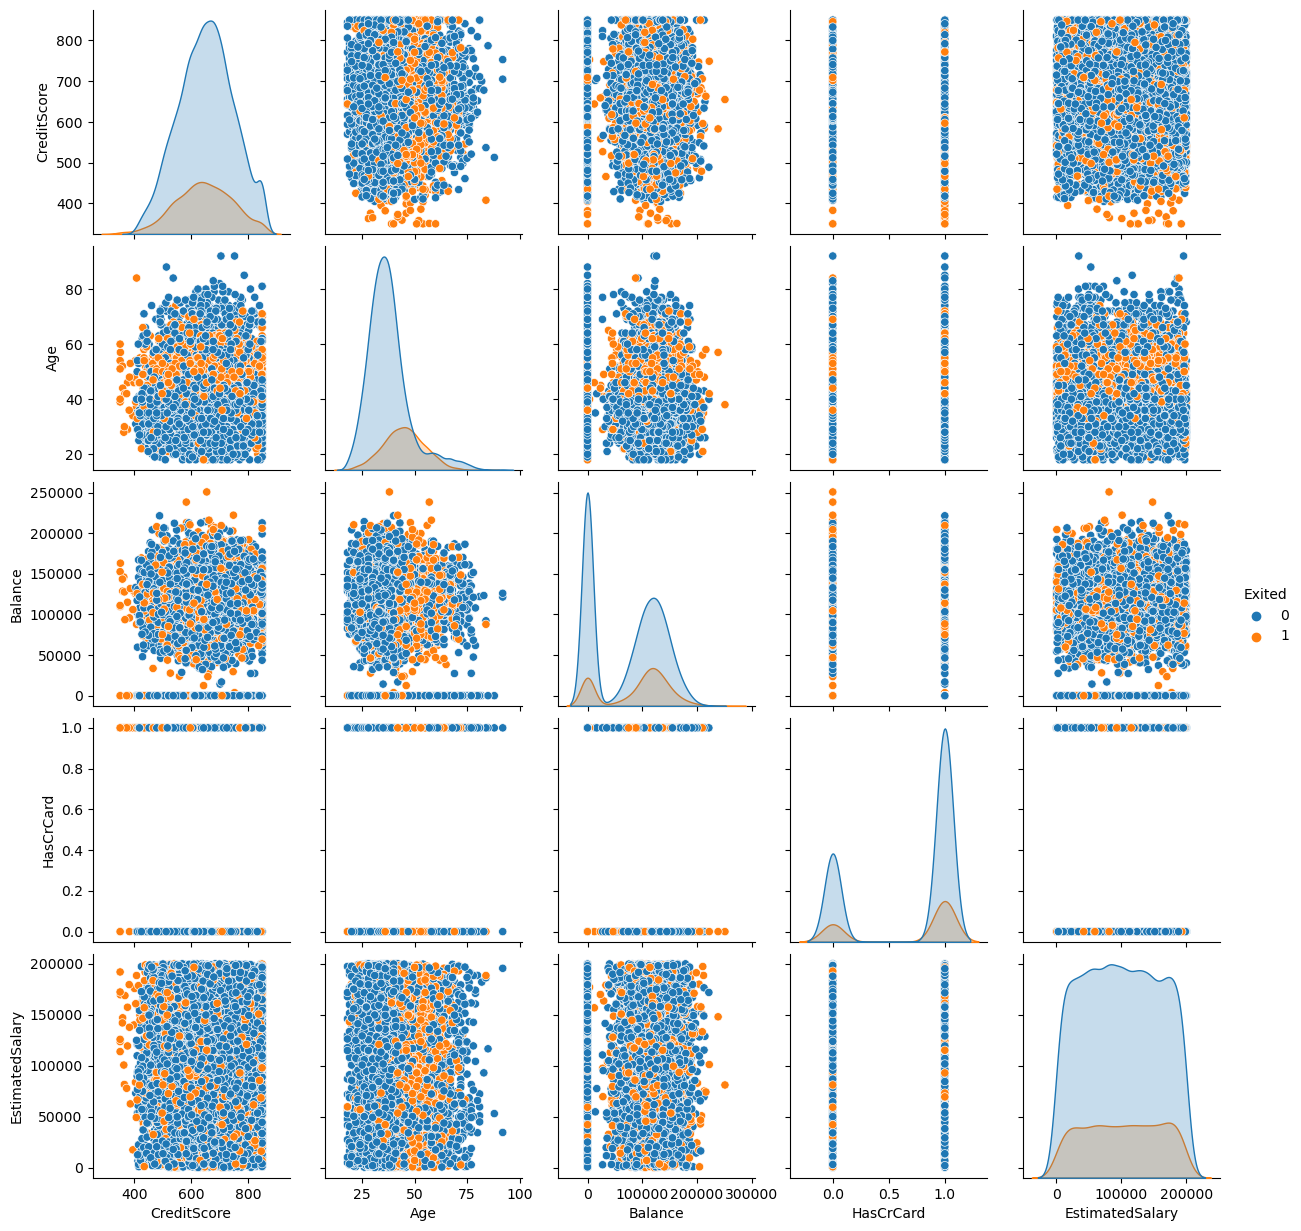

In [20]:
# relationship between all variables classified by Exited in a single layout

sns.pairplot(data=df[['CreditScore', 'Age' ,'Balance', 'HasCrCard' ,'EstimatedSalary', 'Exited']],hue='Exited')

<Axes: xlabel='Exited', ylabel='count'>

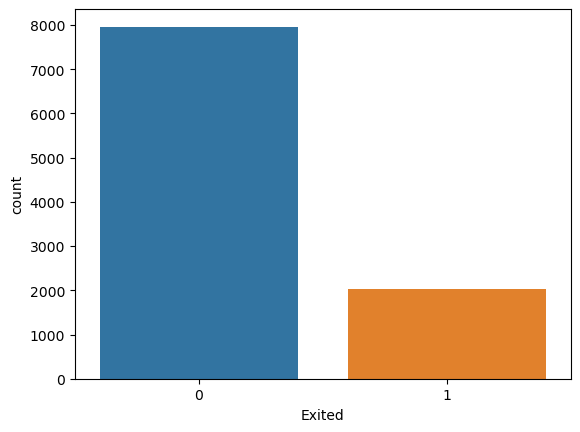

In [24]:
# count of members for the 'Exited' variable

sns.countplot(x="Exited", data=df)

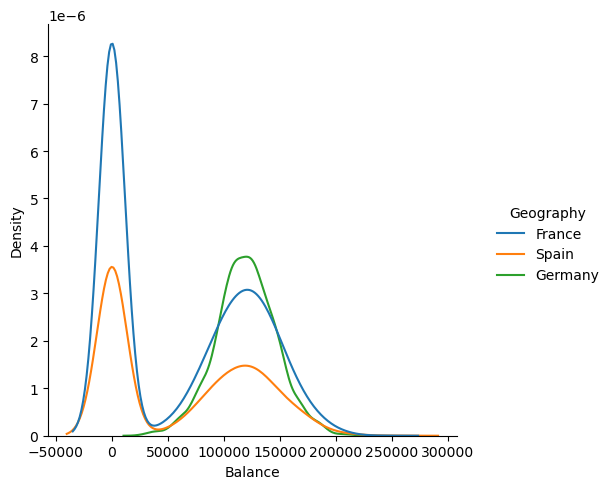

In [26]:
#  balance distribution by country

sns.displot(data=df, x="Balance", hue="Geography", kind="kde")

In [27]:
# Feature engineering: drop columns and adjust columns to prevent data leakage

df= df.drop(columns=['Surname', 'RowNumber', 'CustomerId'])

In [28]:
Geography= pd.get_dummies(df['Geography'], drop_first=True)
Gender= pd.get_dummies(df['Gender'], drop_first=True)

df = pd.concat([df, Geography, Gender], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Germany          10000 non-null  uint8  
 12  Spain            10000 non-null  uint8  
 13  Male             10000 non-null  uint8  
dtypes: float64(2), int64(7), object(2), uint8(3)
memory usage: 888.8+ KB


In [29]:
X=df.drop(['Exited', 'Geography', 'Gender'],axis=1)
Y=df['Exited']

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [31]:
# split dataset 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [32]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb

In [33]:
# Model - set parameters 

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

y_pred = xgb_model.predict(X_train)

print(accuracy_score(Y_train, y_pred))

0.9601428571428572


In [34]:
#  Train an xgboost with logistic objective and n_estimators 30 and maximal depth 2

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=30, max_depth=2,random_state=42)

# Fit it to the training set
xgb_model.fit(X_train, Y_train)

# Predict the labels of the test set
y_preds = xgb_model.predict(X_test)
print(accuracy_score(Y_test, y_preds))

0.8666666666666667


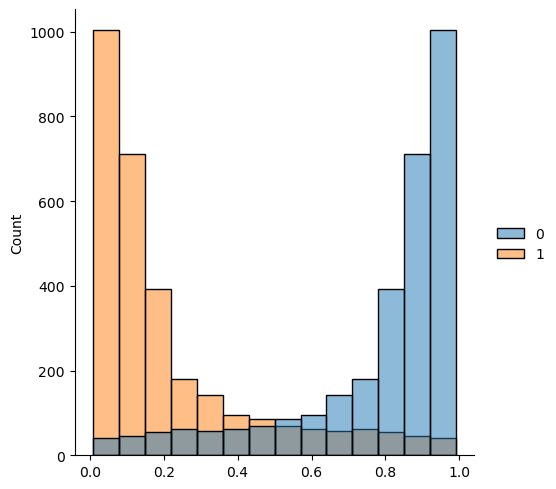

In [35]:
# Plot the histogram of the score

preds = xgb_model.predict_proba(X_test)
sns.displot(preds)

In [36]:
# Estimate the precision and recall for threshold equal to [0.1,0.5,0.7,0.8] using the test dataset

for threshold in [0.1,0.5,0.7,0.8]:
    y_pred_int = (preds[:,1]> threshold).astype(int)
    print("T=%.1f" % threshold)
    print(classification_report( Y_test, y_pred_int))

T=0.1
              precision    recall  f1-score   support

           0       0.97      0.49      0.65      2379
           1       0.32      0.93      0.48       621

    accuracy                           0.58      3000
   macro avg       0.65      0.71      0.57      3000
weighted avg       0.83      0.58      0.62      3000

T=0.5
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.78      0.49      0.60       621

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000

T=0.7
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2379
           1       0.91      0.31      0.46       621

    accuracy                           0.85      3000
   macro avg       0.88      0.65      0.69      3000
weighted avg       0.86      0.85      0.82      3000

T

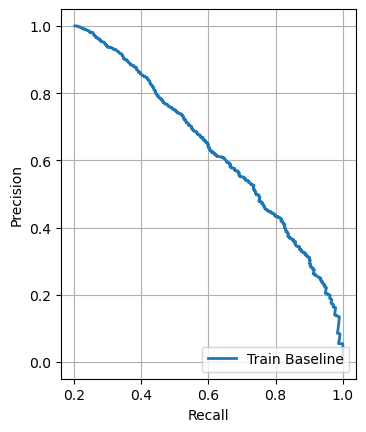

In [37]:
# PR curve analysis 

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    
y_preds_prob = xgb_model.predict_proba(X_train)
plot_prc("Train Baseline",Y_train, y_preds_prob[:,1])
plt.legend(loc='lower right');

In [40]:
## The goal is that the model produces as few errors as possible.

In [38]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
    }


# Insantiate XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid,scoring='f1',
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X_train, Y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.1s
[CV] END